<a href="https://colab.research.google.com/github/dinooooooi/dinooooi/blob/main/0527%EC%9B%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. 합성곱 신경망(CNN)
##1. 합성곱 신경망
: 데이터가 가진 특징들의 패턴을 학습하는 알고리즘

ex. 이미지 분류, 객체 탐지, 스타일 전이 등
###1-1. 이미지 표현
컴퓨터가 이해할 수 있게 이미지를 숫자로 표현

컬러 이미지는 r, g, b 채널로 구성된 3장의 이미지를 겹쳐서 표현
###1-2. 합성곱(Convolution)
: 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성 추출

입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영하고 겹치는 부분에 대하여 합성곱 연산을 수행

커널 사이즈가 3*3일 경우 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트함

특성맵 : 합성곱 연산을 통해 추출된 이미지
###1-3. 채널(channel)
: 입력 이미지를 구성하는 2차원 배열의 개수
###1-4. 스트라이드(stride)
커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나갈 떼 이동하는 간격을 스트라이드라고 함.
###1-5. 패딩(padding)
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정
###1-6. 특성맵(feature map) 사이즈
패딩과 스트라이드를 적용
###1-7. 풀링(pooling)
추출된 특성맵에 대해 다운 샘플링하여 이미지 크기를 축소하는 레이어

연산량이 감소하고 과대적합을 방지

- 최대 풀링: 특징의 값이 큰 값이 다른 특징들을 대표
- 평균 풀링
##2. 간단한 모델 생성
###2-1. 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


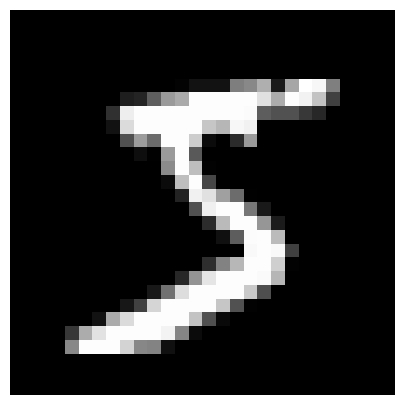

In [2]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [3]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [4]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train [..., tf.newaxis]
x_valid_in = x_valid [..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###2-2. Sequential API로 모델 생성 및 학습
최종 분류기로 Dense 레이어 적용하기 위해 Flatten 층 추가하여 1차원 배열 펼쳐줌

In [6]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    # Max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2141 - accuracy: 0.9398 - val_loss: 0.0982 - val_accuracy: 0.9686
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0797 - accuracy: 0.9771 - val_loss: 0.0675 - val_accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 0.0654 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0548 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0590 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0563 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0538 -

In [8]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0572 - accuracy: 0.9840


[0.05721466615796089, 0.984000027179718]

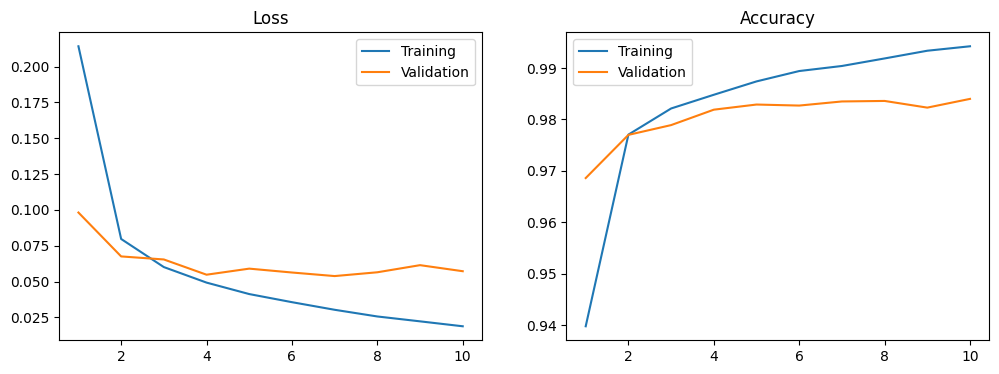

In [9]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

###2-3. 모델 구조 파악
summary() 메소드는 모델의 구조를 요약해 각 레이어의 이름과 출력 텐서의 형태, 각 레이어를 구성하는 파라미터 개수 알 수 있음

In [10]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [12]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
# 레이어
model.layers

In [14]:
# 첫번째 레이어 선택
model.layers[0]

In [15]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [17]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.12176117, -0.52454233,  0.74834096, -0.47748655,
            0.28838944,  0.28939113,  0.31363884,  0.32626107,
            0.44957036, -0.05801526, -0.08796476, -1.1393058 ,
            0.16411649, -0.08706553, -0.01659164, -0.81911033,
           -0.03290115,  0.1545404 , -0.3428123 , -0.88576764,
           -0.8135112 ,  0.2595723 , -0.30305436,  0.3093356 ,
            0.00653698,  0.22339843, -0.34602153, -0.6959715 ,
            0.30510014,  0.01592266,  0.44562277,  0.2559601 ]],
 
         [[-0.62344223, -0.68813175,  0.07719381, -0.4455973 ,
            0.07686821,  0.34723514,  0.1119305 ,  0.09449285,
            0.29498234,  0.20832397, -0.26304933, -0.70003414,
            0.28539556,  0.4839811 ,  0.43596715, -0.04005974,
            0.42210358, -0.01923987, -0.65171355, -0.45089725,
           -0.39946482,  0.14756191, -0.33268663,  0.0801166 ,
            0.70856714,  0.22137819, -0.27

In [18]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.12176117, -0.52454233,  0.74834096, -0.47748655,
           0.28838944,  0.28939113,  0.31363884,  0.32626107,
           0.44957036, -0.05801526, -0.08796476, -1.1393058 ,
           0.16411649, -0.08706553, -0.01659164, -0.81911033,
          -0.03290115,  0.1545404 , -0.3428123 , -0.88576764,
          -0.8135112 ,  0.2595723 , -0.30305436,  0.3093356 ,
           0.00653698,  0.22339843, -0.34602153, -0.6959715 ,
           0.30510014,  0.01592266,  0.44562277,  0.2559601 ]],

        [[-0.62344223, -0.68813175,  0.07719381, -0.4455973 ,
           0.07686821,  0.34723514,  0.1119305 ,  0.09449285,
           0.29498234,  0.20832397, -0.26304933, -0.70003414,
           0.28539556,  0.4839811 ,  0.43596715, -0.04005974,
           0.42210358, -0.01923987, -0.65171355, -0.45089725,
          -0.39946482,  0.14756191, -0.33268663,  0.0801166 ,
           0.70856714,  0.22137819, -0.27739388, -0.664419

In [19]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.11442592, -0.03176966,  0.00511396, -0.02985631, -0.3069043 ,
       -0.17974426, -0.41762844, -0.43747047, -0.09812281, -0.02290708,
       -0.0515825 ,  0.05063047, -0.01684024, -0.22190641, -0.33558998,
       -0.07187378, -0.16261643, -0.23251611, -0.06338686, -0.07693931,
       -0.29685006, -0.2730928 , -0.08110896, -0.16458672, -0.04602234,
       -0.11553115, -0.28201187, -0.05324537,  0.20448631, -0.06864779,
       -0.03455025, -0.30624443], dtype=float32)>

In [20]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [21]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 99ms/step


2

In [22]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

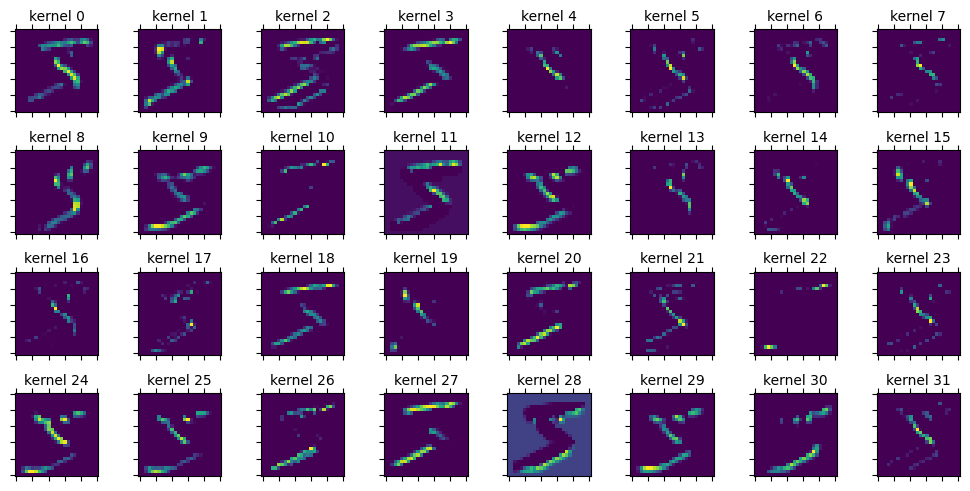

In [23]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [24]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

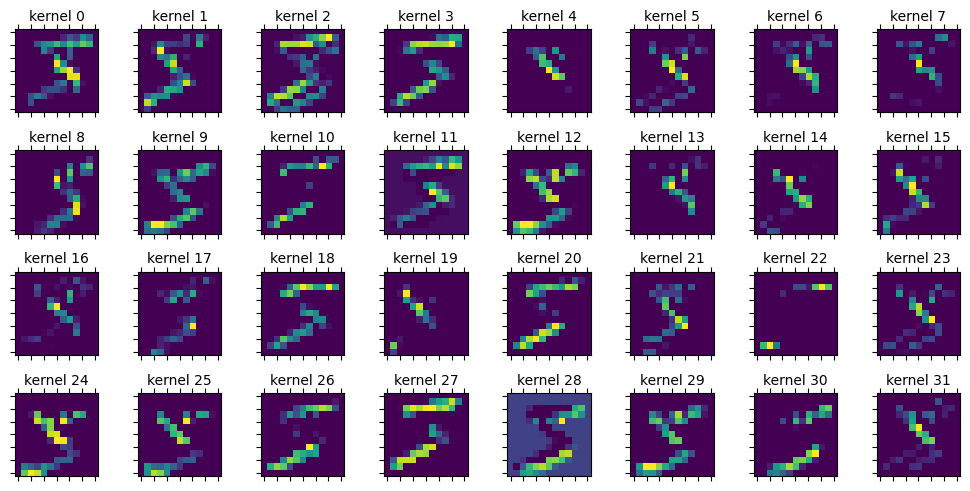

In [25]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

##3. 복잡한 모델 생성

Functional API를 사용해 복잡한 구조의 모델 정의
###3-1. 데이터셋 준비

In [26]:
# tensorflow 모듈 import
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [28]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [29]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [30]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
함수의 입력과 출력으로 표현할 수 있어 자유롭게 모델 구조를 정의할 수 있는 장점

In [31]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

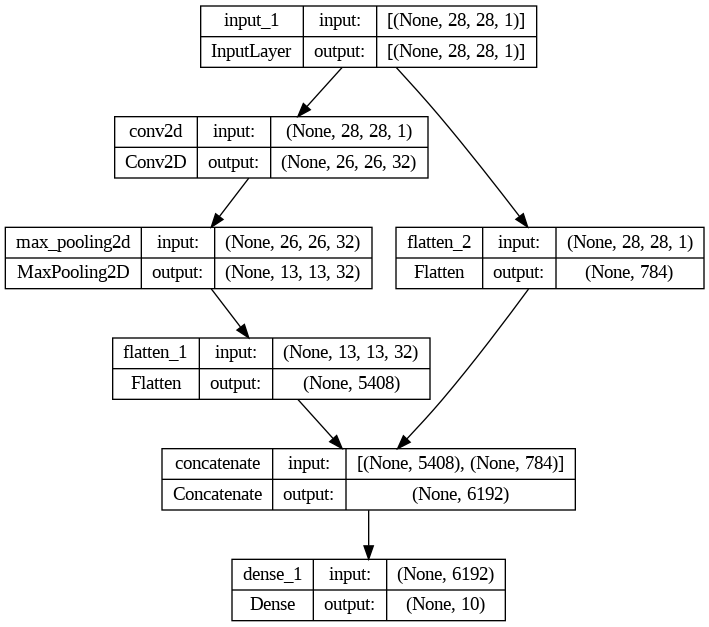

In [32]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [33]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2014 - accuracy: 0.9428 - val_loss: 0.0810 - val_accuracy: 0.9752
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0784 - accuracy: 0.9771 - val_loss: 0.0633 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0556 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0532 -

In [34]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [35]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


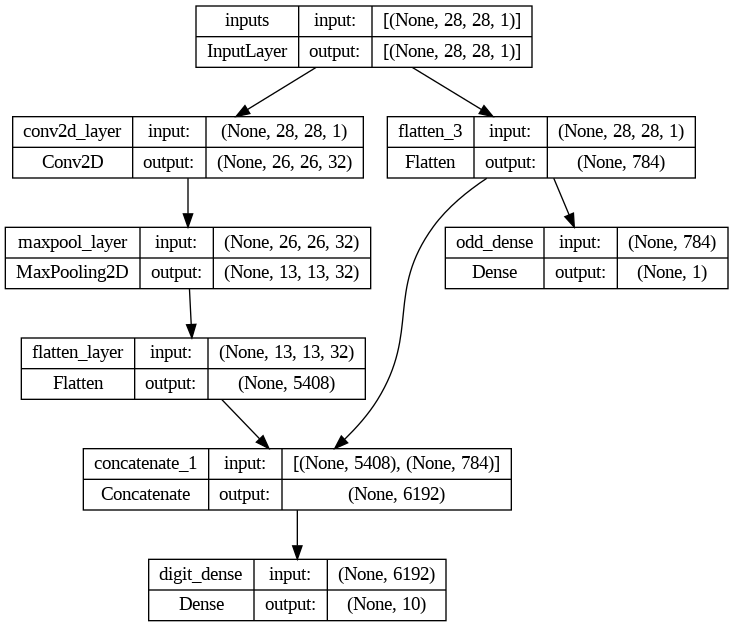

In [36]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5}, metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3768 - digit_dense_loss: 0.2143 - odd_dense_loss: 0.3249 - digit_dense_accuracy: 0.9380 - odd_dense_accuracy: 0.8647 - val_loss: 0.2316 - val_digit_dense_loss: 0.0931 - val_odd_dense_loss: 0.2769 - val_digit_dense_accuracy: 0.9703 - val_odd_dense_accuracy: 0.8852
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2146 - digit_dense_loss: 0.0787 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9771 - odd_dense_accuracy: 0.8913 - val_loss: 0.2055 - val_digit_dense_loss: 0.0739 - val_odd_dense_loss: 0.2633 - val_digit_dense_accuracy: 0.9765 - val_odd_dense_accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1912 - digit_dense_loss: 0.0598 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.8956 - val_loss: 0.1861 - val_digit_dense_loss: 0.0566 - val_odd_dense_loss: 0.2590 - val_digit_dense_accuracy: 0.9820 -

In [38]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1836 - digit_dense_loss: 0.0558 - odd_dense_loss: 0.2556 - digit_dense_accuracy: 0.9843 - odd_dense_accuracy: 0.9018


[0.18355101346969604,
 0.05577553063631058,
 0.25555095076560974,
 0.9843000173568726,
 0.9017999768257141]

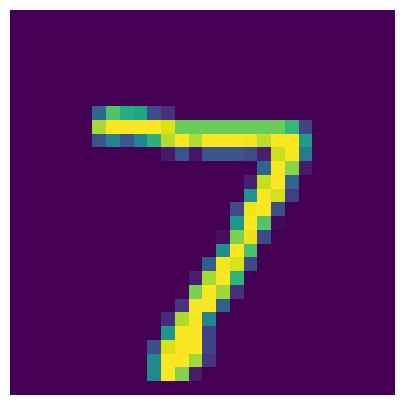

In [39]:
# 샘플 이미지 출력
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid,0)

In [40]:
digit_preds, odd_preds = model.predict(x_valid_in)
# 숫자 7 이미지에 대한 예측 확률
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 8ms/step
[3.39045252e-13 1.28627886e-10 1.02057851e-09 5.88071636e-08
 1.71785795e-12 3.58607621e-13 1.05829286e-20 9.99999940e-01
 2.80692158e-09 5.86736970e-09]
[0.9995587]


In [41]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [42]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

###3-4. 전이 학습(Transfer Learning)

In [43]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


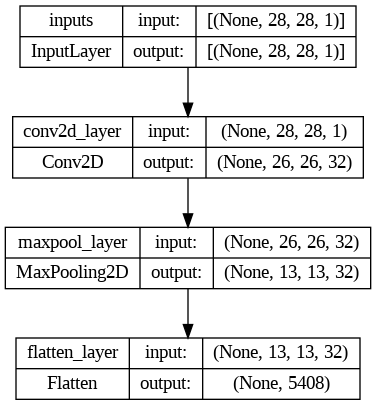

In [44]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

In [45]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


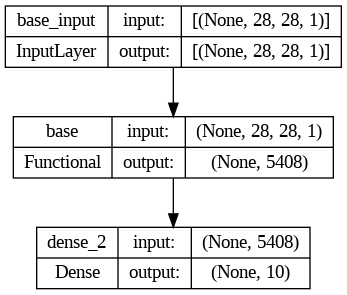

In [46]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [47]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1296 - accuracy: 0.9649 - val_loss: 0.0670 - val_accuracy: 0.9777
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0576 - accuracy: 0.9834 - val_loss: 0.0533 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0535 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0508 -

In [48]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [49]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [50]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1160 - accuracy: 0.9690 - val_loss: 0.0539 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0513 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0491 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0557 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.0529 - val_a

In [51]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [52]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [53]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1157 - accuracy: 0.9692 - val_loss: 0.0538 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0490 - accuracy: 0.9858 - val_loss: 0.0511 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0492 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0513 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0538 - val_accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0519 - val_ac